In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pyarrow

import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install opendatasets --quiet
import opendatasets as od
od.download("https://www.kaggle.com/datasets/abdelhamed1/london-house-price-data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mohamedismail11
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/abdelhamed1/london-house-price-data


100%|██████████| 20.4M/20.4M [00:00<00:00, 1.50GB/s]

In [3]:
import os

os.listdir('./london-house-price-data')

['kaggle_london_house_price_data.parquet']

In [7]:
df = pd.read_parquet('./london-house-price-data/kaggle_london_house_price_data.parquet')
df.head()

,fullAddress,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,...,saleEstimate_upperPrice,saleEstimate_confidenceLevel,saleEstimate_ingestedAt,saleEstimate_valueChange.numericChange,saleEstimate_valueChange.percentageChange,saleEstimate_valueChange.saleDate,history_date,history_price,history_percentageChange,history_numericChange
0,"Flat 9, 35 Furnival Street, London, EC4A 1JQ",EC4A 1JQ,England,EC4A,51.517282,-0.110314,1.0,1.0,45.0,1.0,...,630000.0,HIGH,2024-10-07T13:26:59.894Z,244000.0,68.539326,2010-03-30,1995-01-02,830000,NaN,NaN
1,"Flat 6, 35 Furnival Street, London, EC4A 1JQ",EC4A 1JQ,England,EC4A,51.517282,-0.110314,NaN,NaN,NaN,NaN,...,660000.0,MEDIUM,2024-10-07T13:26:59.894Z,425000.0,242.857143,2000-05-26,1995-01-02,830000,NaN,NaN
2,"Flat 35, Octavia House, Medway Street, London,...",SW1P 2TA,England,SW1P,51.495505,-0.132379,2.0,2.0,71.0,1.0,...,834000.0,MEDIUM,2025-01-10T11:04:57.114Z,49000.0,6.901408,2019-09-04,1995-01-03,249950,NaN,NaN
3,"24 Chester Court, Lomond Grove, London, SE5 7HS",SE5 7HS,England,SE5,51.478185,-0.092201,1.0,1.0,64.0,1.0,...,407000.0,HIGH,2024-10-07T13:26:59.894Z,28000.0,7.777778,2024-01-25,1995-01-03,32000,NaN,NaN
4,"18 Alexandra Gardens, London, N10 3RL",N10 3RL,England,N10,51.588774,-0.139599,1.0,4.0,137.0,2.0,...,1324000.0,HIGH,2024-10-07T13:26:59.894Z,81000.0,6.864407,2022-12-14,1995-01-03,133000,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418201 entries, 0 to 418200
Data columns (total 28 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   fullAddress                                418201 non-null  object 
 1   postcode                                   418201 non-null  object 
 2   country                                    418201 non-null  object 
 3   outcode                                    418201 non-null  object 
 4   latitude                                   418201 non-null  float64
 5   longitude                                  418201 non-null  float64
 6   bathrooms                                  340270 non-null  float64
 7   bedrooms                                   377665 non-null  float64
 8   floorAreaSqM                               392991 non-null  float64
 9   livingRooms                                357701 non-null  float64
 10  tenure  

In [9]:
df.columns

Index(['fullAddress', 'postcode', 'country', 'outcode', 'latitude',
       'longitude', 'bathrooms', 'bedrooms', 'floorAreaSqM', 'livingRooms',
       'tenure', 'propertyType', 'currentEnergyRating',
       'rentEstimate_lowerPrice', 'rentEstimate_currentPrice',
       'rentEstimate_upperPrice', 'saleEstimate_lowerPrice',
       'saleEstimate_currentPrice', 'saleEstimate_upperPrice',
       'saleEstimate_confidenceLevel', 'saleEstimate_ingestedAt',
       'saleEstimate_valueChange.numericChange',
       'saleEstimate_valueChange.percentageChange',
       'saleEstimate_valueChange.saleDate', 'history_date', 'history_price',
       'history_percentageChange', 'history_numericChange'],
      dtype='object')

In [10]:
df['fullAddress'].nunique()

137760

In [11]:
df.isna().sum() / df.shape[0] * 100

,0
fullAddress,0.000000
postcode,0.000000
country,0.000000
outcode,0.000000
latitude,0.000000
longitude,0.000000
bathrooms,18.634819
bedrooms,9.692947
floorAreaSqM,6.028202
livingRooms,14.466728


In [12]:
df = df.drop(['history_percentageChange', 'history_numericChange'], axis=1)

In [13]:
df.isna().sum() / df.shape[0] * 100

,0
fullAddress,0.000000
postcode,0.000000
country,0.000000
outcode,0.000000
latitude,0.000000
longitude,0.000000
bathrooms,18.634819
bedrooms,9.692947
floorAreaSqM,6.028202
livingRooms,14.466728


In [14]:
df.drop('currentEnergyRating', axis=1, inplace=True)

In [15]:
df = df.dropna()

In [16]:
df.isna().sum()

,0
fullAddress,0
postcode,0
country,0
outcode,0
latitude,0
longitude,0
bathrooms,0
bedrooms,0
floorAreaSqM,0
livingRooms,0


In [17]:
df.duplicated().sum()

np.int64(626)

In [18]:
df = df.drop_duplicates()

In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
df.shape[0]

316234

In [21]:
df['fullAddress'].nunique()

97059

In [22]:
df.sample()

,fullAddress,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,...,saleEstimate_lowerPrice,saleEstimate_currentPrice,saleEstimate_upperPrice,saleEstimate_confidenceLevel,saleEstimate_ingestedAt,saleEstimate_valueChange.numericChange,saleEstimate_valueChange.percentageChange,saleEstimate_valueChange.saleDate,history_date,history_price
205824,"8 Ashley Gardens, Ambrosden Avenue, London, SW...",SW1P 1QD,England,SW1P,51.496512,-0.139152,2.0,4.0,245.0,2.0,...,2504000.0,2635000.0,2767000.0,HIGH,2025-01-10T11:04:57.114Z,-365000.0,-12.166667,2015-10-15,2015-10-15,3000000


In [23]:
df.drop(['postcode', 'country', 'outcode'], axis=1, inplace=True)

In [24]:
df.columns

Index(['fullAddress', 'latitude', 'longitude', 'bathrooms', 'bedrooms',
       'floorAreaSqM', 'livingRooms', 'tenure', 'propertyType',
       'rentEstimate_lowerPrice', 'rentEstimate_currentPrice',
       'rentEstimate_upperPrice', 'saleEstimate_lowerPrice',
       'saleEstimate_currentPrice', 'saleEstimate_upperPrice',
       'saleEstimate_confidenceLevel', 'saleEstimate_ingestedAt',
       'saleEstimate_valueChange.numericChange',
       'saleEstimate_valueChange.percentageChange',
       'saleEstimate_valueChange.saleDate', 'history_date', 'history_price'],
      dtype='object')

In [30]:
df.head()

,fullAddress,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,saleEstimate_currentPrice
0,"Flat 9, 35 Furnival Street, London, EC4A 1JQ",51.517282,-0.110314,1.0,1.0,45.0,1.0,Leasehold,Purpose Built Flat,600000.0
2,"Flat 35, Octavia House, Medway Street, London,...",51.495505,-0.132379,2.0,2.0,71.0,1.0,Leasehold,Flat/Maisonette,759000.0
3,"24 Chester Court, Lomond Grove, London, SE5 7HS",51.478185,-0.092201,1.0,1.0,64.0,1.0,Leasehold,Flat/Maisonette,388000.0
4,"18 Alexandra Gardens, London, N10 3RL",51.588774,-0.139599,1.0,4.0,137.0,2.0,Freehold,End Terrace House,1261000.0
5,"17 Collins Street, London, SE3 0UG",51.466089,0.006967,1.0,2.0,97.0,1.0,Freehold,Mid Terrace House,944000.0


In [31]:
df.describe()

,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,saleEstimate_currentPrice
count,316234.000000,316234.000000,316234.000000,316234.000000,316234.000000,316234.000000,3.162340e+05
mean,51.506087,-0.098874,1.445553,2.499194,100.056423,1.286010,8.726577e+05
std,0.057907,0.089344,0.711908,1.157712,55.253231,0.569521,8.179182e+05
min,51.385708,-0.347055,1.000000,1.000000,10.000000,1.000000,8.900000e+04
25%,51.461030,-0.156647,1.000000,2.000000,64.000000,1.000000,4.450000e+05
50%,51.497076,-0.103573,1.000000,2.000000,85.000000,1.000000,6.170000e+05
75%,51.550924,-0.037849,2.000000,3.000000,118.000000,1.000000,9.630000e+05
max,51.665823,0.139249,9.000000,9.000000,500.000000,7.000000,1.784400e+07


{'whiskers': [<matplotlib.lines.Line2D at 0x7992ad40cfe0>,
 'caps': [<matplotlib.lines.Line2D at 0x7992ad40d4f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7992b026a6f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7992ad40db50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7992ad40de50>],
 'means': []}

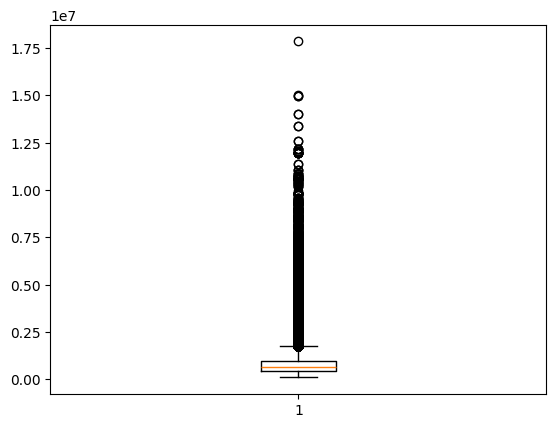

In [32]:
plt.boxplot(df['saleEstimate_currentPrice'])

In [34]:
q1 = df['saleEstimate_currentPrice'].quantile(0.25)
q3 = df['saleEstimate_currentPrice'].quantile(0.75)

iqr = q3 - q1

upper , lower = q3 + 1.5*iqr , q1 - 1.5*iqr

df[(df['saleEstimate_currentPrice'] > upper) | (df['saleEstimate_currentPrice']<lower)]

,fullAddress,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,saleEstimate_currentPrice
20,"71A Park Mansions, Knightsbridge, London, SW1X...",51.501570,-0.161669,3.0,3.0,134.0,2.0,Leasehold,Flat/Maisonette,3203000.0
42,"40 Rectory Road, London, SW13 0DT",51.473087,-0.240024,2.0,4.0,225.0,2.0,Freehold,Semi-Detached House,2360000.0
59,"2 Harley Gardens, London, SW10 9SW",51.488148,-0.181568,4.0,5.0,317.0,4.0,Freehold,Semi-Detached House,11958000.0
82,"15 Leinster Road, London, N10 3AN",51.587214,-0.141020,2.0,4.0,197.0,1.0,Freehold,Mid Terrace House,2009000.0
120,"Flat 28, York House, 39 Upper Montagu Street, ...",51.520516,-0.161035,2.0,2.0,107.0,1.0,Leasehold,Converted Flat,1862000.0
...,...,...,...,...,...,...,...,...,...,...
417802,"Flat 2, 94 New Cavendish Street, London, W1W 6XL",51.519788,-0.143911,1.0,2.0,150.0,1.0,Leasehold,Purpose Built Flat,2913000.0
417932,"79 Cambridge Street, London, SW1V 4PS",51.490324,-0.143683,3.0,4.0,250.0,3.0,Freehold,Mid Terrace House,3243000.0
417985,"75 Rodenhurst Road, London, SW4 8AF",51.453073,-0.136082,3.0,5.0,247.0,3.0,Freehold,Semi-Detached House,2581000.0
418008,"110 Mallinson Road, London, SW11 1BN",51.458914,-0.164318,3.0,5.0,176.0,2.0,Freehold,Mid Terrace House,1807000.0


In [35]:
df.shape[0]

316234

In [36]:
df.head()

,fullAddress,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,saleEstimate_currentPrice
0,"Flat 9, 35 Furnival Street, London, EC4A 1JQ",51.517282,-0.110314,1.0,1.0,45.0,1.0,Leasehold,Purpose Built Flat,600000.0
2,"Flat 35, Octavia House, Medway Street, London,...",51.495505,-0.132379,2.0,2.0,71.0,1.0,Leasehold,Flat/Maisonette,759000.0
3,"24 Chester Court, Lomond Grove, London, SE5 7HS",51.478185,-0.092201,1.0,1.0,64.0,1.0,Leasehold,Flat/Maisonette,388000.0
4,"18 Alexandra Gardens, London, N10 3RL",51.588774,-0.139599,1.0,4.0,137.0,2.0,Freehold,End Terrace House,1261000.0
5,"17 Collins Street, London, SE3 0UG",51.466089,0.006967,1.0,2.0,97.0,1.0,Freehold,Mid Terrace House,944000.0


In [37]:
df = df[(df['saleEstimate_currentPrice'] < upper) & (df['saleEstimate_currentPrice'] > lower)]

In [38]:
df.shape

(289037, 10)

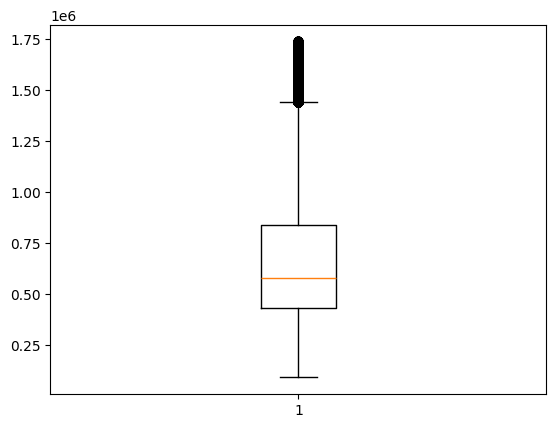

In [39]:
plt.boxplot(df['saleEstimate_currentPrice'])
plt.show()

In [43]:
df.head()

,fullAddress,latitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,saleEstimate_currentPrice
0,"Flat 9, 35 Furnival Street, London, EC4A 1JQ",51.517282,1.0,1.0,45.0,1.0,Leasehold,Purpose Built Flat,600000.0
2,"Flat 35, Octavia House, Medway Street, London,...",51.495505,2.0,2.0,71.0,1.0,Leasehold,Flat/Maisonette,759000.0
3,"24 Chester Court, Lomond Grove, London, SE5 7HS",51.478185,1.0,1.0,64.0,1.0,Leasehold,Flat/Maisonette,388000.0
4,"18 Alexandra Gardens, London, N10 3RL",51.588774,1.0,4.0,137.0,2.0,Freehold,End Terrace House,1261000.0
5,"17 Collins Street, London, SE3 0UG",51.466089,1.0,2.0,97.0,1.0,Freehold,Mid Terrace House,944000.0


In [44]:
df.shape

(289037, 9)

In [45]:
df.isna().sum()

,0
fullAddress,0
latitude,0
bathrooms,0
bedrooms,0
floorAreaSqM,0
livingRooms,0
tenure,0
propertyType,0
saleEstimate_currentPrice,0


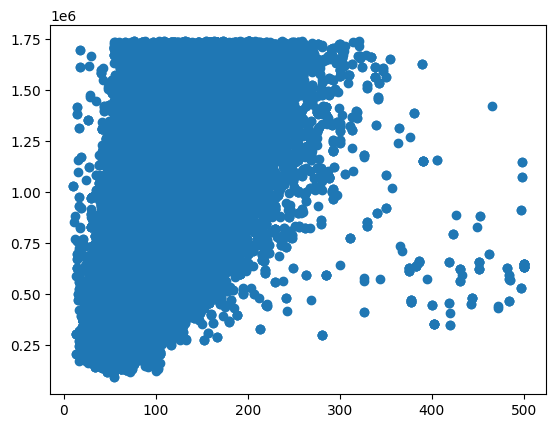

In [46]:
plt.scatter(df['floorAreaSqM'], df['saleEstimate_currentPrice'])
plt.show()

In [47]:
df.duplicated().sum()

np.int64(175168)

In [48]:
df['saleEstimate_currentPrice'].nunique()

1613

In [49]:
df['saleEstimate_currentPrice'].value_counts()

,count
saleEstimate_currentPrice,
448000.0,636
427000.0,634
453000.0,631
397000.0,624
433000.0,623
...,...
128000.0,2
115000.0,1
122000.0,1


In [50]:
df['tenure'].nunique()

4

In [51]:
df['tenure'].value_counts()

,count
tenure,
Leasehold,174559
Freehold,111325
Feudal,2770
Shared,383


In [52]:
df.shape[0]

289037

In [53]:
df.reset_index(drop=True, inplace=True)

In [54]:
df.index

RangeIndex(start=0, stop=289037, step=1)

In [55]:
from sklearn.preprocessing import OneHotEncoder

In [56]:
ohe = OneHotEncoder(sparse_output=False, drop='first')

In [57]:
ohe_arr = ohe.fit_transform(df[['tenure']])

In [58]:
ohe_arr

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [59]:
df['tenure'].value_counts()

,count
tenure,
Leasehold,174559
Freehold,111325
Feudal,2770
Shared,383


In [60]:
df[['tenure']].head()

,tenure
0,Leasehold
1,Leasehold
2,Leasehold
3,Freehold
4,Freehold


In [61]:
ohe_df = pd.DataFrame(ohe_arr, columns=ohe.get_feature_names_out(['tenure']))

In [62]:
ohe_df.shape

(289037, 3)

In [63]:
ohe_df[(ohe_df['tenure_Freehold'] == 0) & (ohe_df['tenure_Leasehold'] == 0) & (ohe_df['tenure_Shared'] == 0)]

,tenure_Freehold,tenure_Leasehold,tenure_Shared
117,0.0,0.0,0.0
282,0.0,0.0,0.0
399,0.0,0.0,0.0
403,0.0,0.0,0.0
833,0.0,0.0,0.0
...,...,...,...
288583,0.0,0.0,0.0
288673,0.0,0.0,0.0
288759,0.0,0.0,0.0
288826,0.0,0.0,0.0


In [64]:
df.head()

,fullAddress,latitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,saleEstimate_currentPrice
0,"Flat 9, 35 Furnival Street, London, EC4A 1JQ",51.517282,1.0,1.0,45.0,1.0,Leasehold,Purpose Built Flat,600000.0
1,"Flat 35, Octavia House, Medway Street, London,...",51.495505,2.0,2.0,71.0,1.0,Leasehold,Flat/Maisonette,759000.0
2,"24 Chester Court, Lomond Grove, London, SE5 7HS",51.478185,1.0,1.0,64.0,1.0,Leasehold,Flat/Maisonette,388000.0
3,"18 Alexandra Gardens, London, N10 3RL",51.588774,1.0,4.0,137.0,2.0,Freehold,End Terrace House,1261000.0
4,"17 Collins Street, London, SE3 0UG",51.466089,1.0,2.0,97.0,1.0,Freehold,Mid Terrace House,944000.0


In [65]:
df_new = pd.concat([df, ohe_df], axis=1)
df_new.head()

,fullAddress,latitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,saleEstimate_currentPrice,tenure_Freehold,tenure_Leasehold,tenure_Shared
0,"Flat 9, 35 Furnival Street, London, EC4A 1JQ",51.517282,1.0,1.0,45.0,1.0,Leasehold,Purpose Built Flat,600000.0,0.0,1.0,0.0
1,"Flat 35, Octavia House, Medway Street, London,...",51.495505,2.0,2.0,71.0,1.0,Leasehold,Flat/Maisonette,759000.0,0.0,1.0,0.0
2,"24 Chester Court, Lomond Grove, London, SE5 7HS",51.478185,1.0,1.0,64.0,1.0,Leasehold,Flat/Maisonette,388000.0,0.0,1.0,0.0
3,"18 Alexandra Gardens, London, N10 3RL",51.588774,1.0,4.0,137.0,2.0,Freehold,End Terrace House,1261000.0,1.0,0.0,0.0
4,"17 Collins Street, London, SE3 0UG",51.466089,1.0,2.0,97.0,1.0,Freehold,Mid Terrace House,944000.0,1.0,0.0,0.0


In [66]:
df_new.isna().sum()

,0
fullAddress,0
latitude,0
bathrooms,0
bedrooms,0
floorAreaSqM,0
livingRooms,0
tenure,0
propertyType,0
saleEstimate_currentPrice,0
tenure_Freehold,0


In [67]:
df_new.shape

(289037, 12)

In [68]:
df = df_new

In [69]:
df_new = df_new.drop('tenure', axis=1)

In [70]:
df.head()

,fullAddress,latitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,saleEstimate_currentPrice,tenure_Freehold,tenure_Leasehold,tenure_Shared
0,"Flat 9, 35 Furnival Street, London, EC4A 1JQ",51.517282,1.0,1.0,45.0,1.0,Leasehold,Purpose Built Flat,600000.0,0.0,1.0,0.0
1,"Flat 35, Octavia House, Medway Street, London,...",51.495505,2.0,2.0,71.0,1.0,Leasehold,Flat/Maisonette,759000.0,0.0,1.0,0.0
2,"24 Chester Court, Lomond Grove, London, SE5 7HS",51.478185,1.0,1.0,64.0,1.0,Leasehold,Flat/Maisonette,388000.0,0.0,1.0,0.0
3,"18 Alexandra Gardens, London, N10 3RL",51.588774,1.0,4.0,137.0,2.0,Freehold,End Terrace House,1261000.0,1.0,0.0,0.0
4,"17 Collins Street, London, SE3 0UG",51.466089,1.0,2.0,97.0,1.0,Freehold,Mid Terrace House,944000.0,1.0,0.0,0.0


In [71]:
df_new.shape

(289037, 11)

In [72]:
df['propertyType'].nunique()

19

In [73]:
df.shape

(289037, 12)

In [74]:
ohe_type_arr = ohe.fit_transform(df['propertyType'].values.reshape(-1,1))

In [75]:
type_df = pd.DataFrame(ohe_type_arr, columns=ohe.get_feature_names_out(['propertyType']))

In [76]:
df_new.head()

,fullAddress,latitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,propertyType,saleEstimate_currentPrice,tenure_Freehold,tenure_Leasehold,tenure_Shared
0,"Flat 9, 35 Furnival Street, London, EC4A 1JQ",51.517282,1.0,1.0,45.0,1.0,Purpose Built Flat,600000.0,0.0,1.0,0.0
1,"Flat 35, Octavia House, Medway Street, London,...",51.495505,2.0,2.0,71.0,1.0,Flat/Maisonette,759000.0,0.0,1.0,0.0
2,"24 Chester Court, Lomond Grove, London, SE5 7HS",51.478185,1.0,1.0,64.0,1.0,Flat/Maisonette,388000.0,0.0,1.0,0.0
3,"18 Alexandra Gardens, London, N10 3RL",51.588774,1.0,4.0,137.0,2.0,End Terrace House,1261000.0,1.0,0.0,0.0
4,"17 Collins Street, London, SE3 0UG",51.466089,1.0,2.0,97.0,1.0,Mid Terrace House,944000.0,1.0,0.0,0.0


In [77]:
type_df.head()

,propertyType_Converted Flat,propertyType_Detached Bungalow,propertyType_Detached House,propertyType_Detached Property,propertyType_End Terrace Bungalow,propertyType_End Terrace House,propertyType_End Terrace Property,propertyType_Flat/Maisonette,propertyType_Mid Terrace Bungalow,propertyType_Mid Terrace House,propertyType_Mid Terrace Property,propertyType_Purpose Built Flat,propertyType_Semi-Detached Bungalow,propertyType_Semi-Detached House,propertyType_Semi-Detached Property,propertyType_Terrace Property,propertyType_Terraced,propertyType_Terraced Bungalow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
df_new.shape

(289037, 11)

In [79]:
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding, TSNE

In [80]:
pca = PCA(n_components=0.99, random_state=42)

In [81]:
pca_data = pca.fit_transform(type_df)

In [82]:
pca_data.shape

(289037, 7)

In [83]:
pca_data

array([[ 0.742635  ,  0.05770498, -0.03027675, ..., -0.01541878,
        -0.00841793, -0.00707652],
       [-0.37319205, -0.60810956, -0.57046625, ..., -0.04224933,
        -0.02162412, -0.01525001],
       [-0.37319205, -0.60810956, -0.57046625, ..., -0.04224933,
        -0.02162412, -0.01525001],
       ...,
       [ 0.742635  ,  0.05770498, -0.03027675, ..., -0.01541878,
        -0.00841793, -0.00707652],
       [-0.48965502,  0.73577771, -0.14916823, ..., -0.03312482,
        -0.01732229, -0.01289274],
       [-0.48965502,  0.73577771, -0.14916823, ..., -0.03312482,
        -0.01732229, -0.01289274]])

In [84]:
cols = [f"PC{i+1}" for i in range(7)]

In [85]:
cols

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']

In [86]:
pca_df = pd.DataFrame(pca_data, columns=cols)

In [87]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.742635,0.057705,-0.030277,-0.058740,-0.015419,-0.008418,-0.007077
1,-0.373192,-0.608110,-0.570466,-0.196051,-0.042249,-0.021624,-0.015250
2,-0.373192,-0.608110,-0.570466,-0.196051,-0.042249,-0.021624,-0.015250
3,-0.188394,-0.071268,0.053576,0.372646,0.310597,0.893857,-0.062003
4,-0.489655,0.735778,-0.149168,-0.143098,-0.033125,-0.017322,-0.012893


In [88]:
df.head()

,fullAddress,latitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,saleEstimate_currentPrice,tenure_Freehold,tenure_Leasehold,tenure_Shared
0,"Flat 9, 35 Furnival Street, London, EC4A 1JQ",51.517282,1.0,1.0,45.0,1.0,Leasehold,Purpose Built Flat,600000.0,0.0,1.0,0.0
1,"Flat 35, Octavia House, Medway Street, London,...",51.495505,2.0,2.0,71.0,1.0,Leasehold,Flat/Maisonette,759000.0,0.0,1.0,0.0
2,"24 Chester Court, Lomond Grove, London, SE5 7HS",51.478185,1.0,1.0,64.0,1.0,Leasehold,Flat/Maisonette,388000.0,0.0,1.0,0.0
3,"18 Alexandra Gardens, London, N10 3RL",51.588774,1.0,4.0,137.0,2.0,Freehold,End Terrace House,1261000.0,1.0,0.0,0.0
4,"17 Collins Street, London, SE3 0UG",51.466089,1.0,2.0,97.0,1.0,Freehold,Mid Terrace House,944000.0,1.0,0.0,0.0


In [89]:
df_new.index

RangeIndex(start=0, stop=289037, step=1)

In [90]:
df_new.head()

,fullAddress,latitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,propertyType,saleEstimate_currentPrice,tenure_Freehold,tenure_Leasehold,tenure_Shared
0,"Flat 9, 35 Furnival Street, London, EC4A 1JQ",51.517282,1.0,1.0,45.0,1.0,Purpose Built Flat,600000.0,0.0,1.0,0.0
1,"Flat 35, Octavia House, Medway Street, London,...",51.495505,2.0,2.0,71.0,1.0,Flat/Maisonette,759000.0,0.0,1.0,0.0
2,"24 Chester Court, Lomond Grove, London, SE5 7HS",51.478185,1.0,1.0,64.0,1.0,Flat/Maisonette,388000.0,0.0,1.0,0.0
3,"18 Alexandra Gardens, London, N10 3RL",51.588774,1.0,4.0,137.0,2.0,End Terrace House,1261000.0,1.0,0.0,0.0
4,"17 Collins Street, London, SE3 0UG",51.466089,1.0,2.0,97.0,1.0,Mid Terrace House,944000.0,1.0,0.0,0.0


In [91]:
df_final = pd.concat([df_new, pca_df], axis=1)

In [92]:
df = df_new

In [93]:
df_final.head()

,fullAddress,latitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,propertyType,saleEstimate_currentPrice,tenure_Freehold,tenure_Leasehold,tenure_Shared,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,"Flat 9, 35 Furnival Street, London, EC4A 1JQ",51.517282,1.0,1.0,45.0,1.0,Purpose Built Flat,600000.0,0.0,1.0,0.0,0.742635,0.057705,-0.030277,-0.058740,-0.015419,-0.008418,-0.007077
1,"Flat 35, Octavia House, Medway Street, London,...",51.495505,2.0,2.0,71.0,1.0,Flat/Maisonette,759000.0,0.0,1.0,0.0,-0.373192,-0.608110,-0.570466,-0.196051,-0.042249,-0.021624,-0.015250
2,"24 Chester Court, Lomond Grove, London, SE5 7HS",51.478185,1.0,1.0,64.0,1.0,Flat/Maisonette,388000.0,0.0,1.0,0.0,-0.373192,-0.608110,-0.570466,-0.196051,-0.042249,-0.021624,-0.015250
3,"18 Alexandra Gardens, London, N10 3RL",51.588774,1.0,4.0,137.0,2.0,End Terrace House,1261000.0,1.0,0.0,0.0,-0.188394,-0.071268,0.053576,0.372646,0.310597,0.893857,-0.062003
4,"17 Collins Street, London, SE3 0UG",51.466089,1.0,2.0,97.0,1.0,Mid Terrace House,944000.0,1.0,0.0,0.0,-0.489655,0.735778,-0.149168,-0.143098,-0.033125,-0.017322,-0.012893


In [94]:
df_final.drop('propertyType', axis=1, inplace=True)

In [95]:
df.head()

,fullAddress,latitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,propertyType,saleEstimate_currentPrice,tenure_Freehold,tenure_Leasehold,tenure_Shared
0,"Flat 9, 35 Furnival Street, London, EC4A 1JQ",51.517282,1.0,1.0,45.0,1.0,Purpose Built Flat,600000.0,0.0,1.0,0.0
1,"Flat 35, Octavia House, Medway Street, London,...",51.495505,2.0,2.0,71.0,1.0,Flat/Maisonette,759000.0,0.0,1.0,0.0
2,"24 Chester Court, Lomond Grove, London, SE5 7HS",51.478185,1.0,1.0,64.0,1.0,Flat/Maisonette,388000.0,0.0,1.0,0.0
3,"18 Alexandra Gardens, London, N10 3RL",51.588774,1.0,4.0,137.0,2.0,End Terrace House,1261000.0,1.0,0.0,0.0
4,"17 Collins Street, London, SE3 0UG",51.466089,1.0,2.0,97.0,1.0,Mid Terrace House,944000.0,1.0,0.0,0.0


In [96]:
df['fullAddress'].nunique()

87769

In [97]:
count = df['fullAddress'].value_counts()

In [98]:
count

,count
fullAddress,
"74 Western Beach Apartments, 36 Hanover Avenue, London, E16 1DZ",223
"Horley Court, 46 Inverness Terrace, London, W2 3JA",136
"Chedworth House, 227 West Green Road, Tottenham, London, N15 5EH",92
"Brook Court, Chinbrook Road, Grove Park, London, SE12 9TY",48
"Flat, 1A Kent House Road, London, SE26 5LN",38
...,...
"60 Radford Road, London, SE13 6RZ",1
"Flat 2, 7 Thornton Avenue, London, SW2 4HL",1
"185 Devonshire Hill Lane, London, N17 7NP",1


In [99]:
df['fullAddress'] = df['fullAddress'].map(count) / len(df)

In [101]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.9 MB/s eta 0:00:00


In [102]:
from category_encoders import CountEncoder

In [103]:
freq = CountEncoder(normalize=True)

In [104]:
df_final['fullAddress'] = freq.fit_transform(df_final['fullAddress'])

In [105]:
df_final.head()

,fullAddress,latitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,saleEstimate_currentPrice,tenure_Freehold,tenure_Leasehold,tenure_Shared,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.000014,51.517282,1.0,1.0,45.0,1.0,600000.0,0.0,1.0,0.0,0.742635,0.057705,-0.030277,-0.058740,-0.015419,-0.008418,-0.007077
1,0.000007,51.495505,2.0,2.0,71.0,1.0,759000.0,0.0,1.0,0.0,-0.373192,-0.608110,-0.570466,-0.196051,-0.042249,-0.021624,-0.015250
2,0.000014,51.478185,1.0,1.0,64.0,1.0,388000.0,0.0,1.0,0.0,-0.373192,-0.608110,-0.570466,-0.196051,-0.042249,-0.021624,-0.015250
3,0.000014,51.588774,1.0,4.0,137.0,2.0,1261000.0,1.0,0.0,0.0,-0.188394,-0.071268,0.053576,0.372646,0.310597,0.893857,-0.062003
4,0.000024,51.466089,1.0,2.0,97.0,1.0,944000.0,1.0,0.0,0.0,-0.489655,0.735778,-0.149168,-0.143098,-0.033125,-0.017322,-0.012893


In [106]:
df_final.isna().sum()

,0
fullAddress,0
latitude,0
bathrooms,0
bedrooms,0
floorAreaSqM,0
livingRooms,0
saleEstimate_currentPrice,0
tenure_Freehold,0
tenure_Leasehold,0
tenure_Shared,0


In [107]:
df_final.shape

(289037, 17)

In [108]:
from sklearn.preprocessing import StandardScaler

In [109]:
scaler = StandardScaler()

In [110]:
cols = ['latitude', 'floorAreaSqM', 'saleEstimate_currentPrice']

for col in cols:
    df_final[col] = scaler.fit_transform(df_final[[col]])

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X = df_final.drop('saleEstimate_currentPrice', axis=1)
y = df_final['saleEstimate_currentPrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
from sklearn.linear_model import LinearRegression

In [114]:
lr = LinearRegression()

lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
lr.score(X_test, y_test)

0.5265411141138019


0.5193786869307547

In [115]:
from sklearn.ensemble import RandomForestRegressor

In [116]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
rf.score(X_test, y_test)

0.9917501696767149


0.9423878495759461